In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
from sklearn.metrics import accuracy_score

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# Implementing a Neural Network from Scratch - An Introduction

In this post, we'll walk through implementing a simple 3-layer neural network from scratch. While we won't derive all the necessary math, I'll provide intuitive explanations of our steps and point to resources for deeper understanding.

Assuming you're familiar with basic calculus and machine learning concepts—like classification, regularization, and optimization techniques such as gradient descent—this post should be insightful. However, even if you're new to these concepts, you'll find this exploration interesting!

But why build a Neural Network from scratch? Even if you plan to use Neural Network libraries like [PyBrain](http://pybrain.org) in the future, starting with a manual implementation is incredibly valuable. It helps you grasp the inner workings of neural networks, which is crucial for designing effective models.

Note that the code examples here prioritize clarity over efficiency. In a future post, we'll explore how to optimize a neural network implementation using [PyBrain](http://pybrain.org).


## Generating a dataset

Let's start by generating a dataset we can play with. Fortunately, [scikit-learn](http://scikit-learn.org/) has some useful dataset generators, so we don't need to write the code ourselves. We will go with the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.

[1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0
 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1
 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1
 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0
 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0
 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0
 1 0 0 0 1 0 0 1 1 1 1 1 

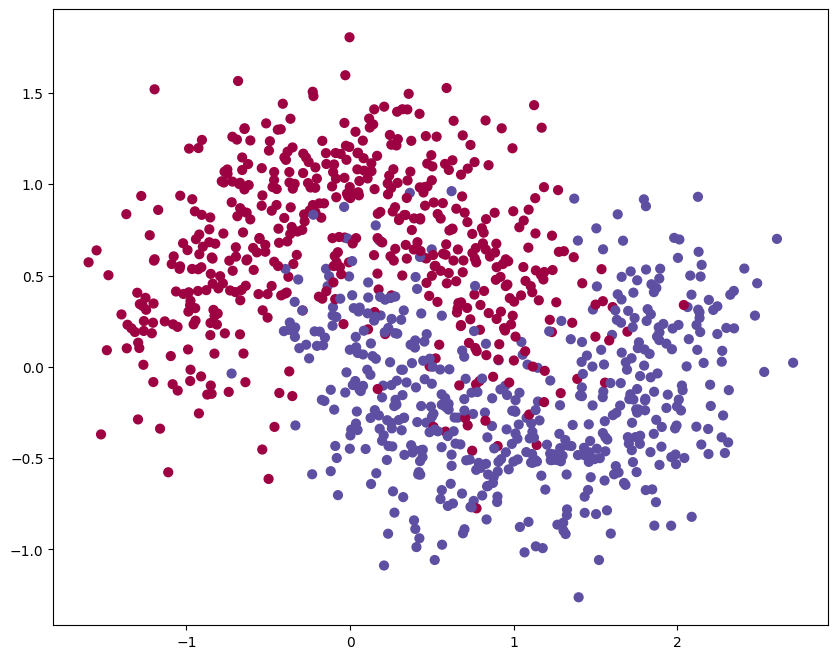

In [26]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(n_samples=1000, shuffle=True, noise=0.30)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
print(y)
print(X.shape)

The dataset we've generated consists of two classes represented by red and blue points. In this analogy, consider the blue dots as male patients and the red dots as female patients, where the x- and y- axes represent medical measurements.

Our objective is to train a machine learning classifier capable of predicting the correct class (male or female) based on these x- and y- coordinates. Notably, the data isn't linearly separable, meaning we cannot draw a straight line that cleanly divides the two classes. This limitation implies that linear classifiers like Logistic Regression would struggle to model this data effectively unless we manually engineer non-linear features (e.g., polynomial features) that suit this specific dataset.

This challenge highlights one of the significant strengths of Neural Networks. Unlike traditional methods, Neural Networks can automatically learn and extract meaningful features from raw data. The hidden layers of a neural network are adept at feature engineering, allowing them to discern intricate patterns and relationships in the data without requiring explicit manual intervention.

## Logistic Regression

To demonstrate the point let's train a Logistic Regression classifier. It's input will be the x- and y-values and the output the predicted class (0 or 1). To make our life easy we use the Logistic Regression class from `scikit-learn`.

In [27]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV()

In [28]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gi
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

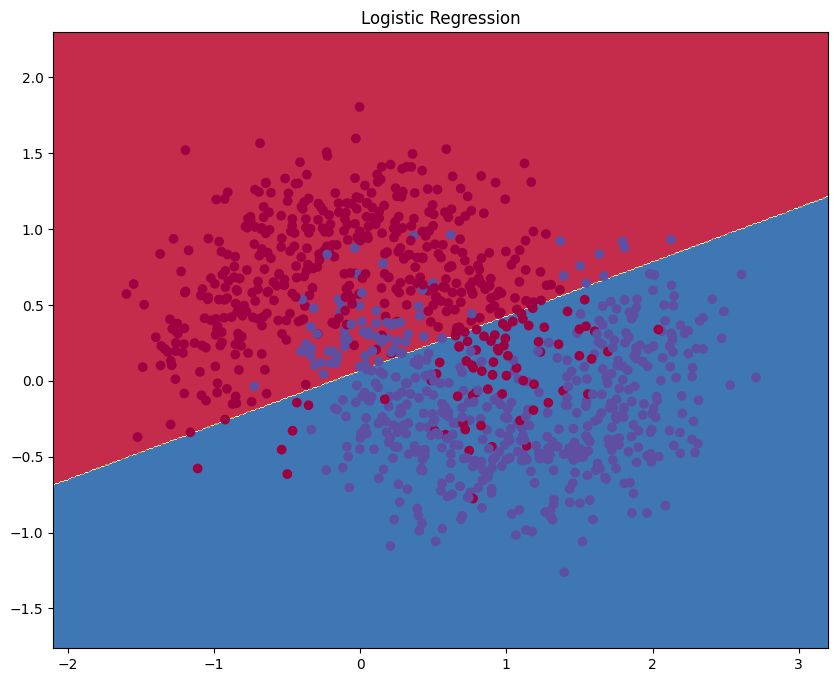

In [29]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x)) # pred_func=lambda x: clf.predict(x), then Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
plt.title("Logistic Regression")

The graph shows the decision boundary learned by our Logistic Regression classifier. It separates the data as good as it can using a straight line, but it's unable to capture the "moon shape" of our data.

## Training a Neural Network

Let's now build a 3-layer neural network with one input layer, one hidden layer, and one output layer. The number of nodes in the input layer is determined by the dimensionality of our data, 2. Similarly, the number of nodes in the output layer is determined by the number of classes we have, also 2. (Because we only have 2 classes we could actually get away with only one output node predicting 0 or 1, but having 2 makes it easier to extend the network to more classes later on). The input to the network will be x- and y- coordinates and its output will be two probabilities, one for class 0 ("female") and one for class 1 ("male"). It looks something like this:![alt text](https://raw.githubusercontent.com/dennybritz/nn-from-scratch/master/nn-3-layer-network.png)

We can choose the dimensionality (the number of nodes) of the hidden layer. The more nodes we put into the hidden layer the more complex functions we will be able fit. But higher dimensionality comes at a cost. First, more computation is required to make predictions and learn the network parameters. A bigger number of parameters also means we become more prone to overfitting our data.

How to choose the size of the hidden layer? While there are some general guidelines and recommendations, it always depends on your specific problem and is more of an art than a science. We will play with the number of nodes in the hidden layer later on and see how it affects our output.

We also need to pick an *activation function* for our hidden layer. The activation function transforms the inputs of the layer into its outputs. A nonlinear activation function is what allows us to fit nonlinear hypotheses. Common chocies for activation functions are [tanh](https://reference.wolfram.com/language/ref/Tanh.html), the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function), or [ReLUs](https://en.wikipedia.org/wiki/Rectifier_(neural_networks). We will use `tanh`, which performs quite well in many scenarios. A nice property of these functions is that their derivate can be computed using the original function value. For example, the derivative of $\tanh x$ is $1-\tanh^2 x$. This is useful because it allows us to compute $\tanh x$ once and re-use its value later on to get the derivative.

Because we want our network to output probabilities the activation function for the output layer will be the [softmax](https://en.wikipedia.org/wiki/Softmax_function), which is simply a way to convert raw scores to probabilities. If you're familiar with the logistic function you can think of softmax as its generalization to multiple classes.

### How our network makes predictions

Our network makes predictions using *forward propagation*, which is just a bunch of matrix multiplications and the application of the activation function(s) we defined above. If $x$ is the 2-dimensional input to our network then we calculate our prediction $\hat{y}$ (also two-dimensional) as follows:

$$
\begin{aligned}
z_1 & = xW_1 + b_1 \\
a_1 & = \tanh(z_1) \\
z_2 & = a_1W_2 + b_2 \\
a_2 & = \hat{y} = \mathrm{softmax}(z_2)
\end{aligned}
$$

$z_i$ is the weighted sum of inputs of layer $i$ (bias included) and $a_i$ is the output of layer $i$ after applying the activation function. $W_1, b_1, W_2, b_2$ are  parameters of our network, which we need to learn from our training data. You can think of them as matrices transforming data between layers of the network. Looking at the matrix multiplications above we can figure out the dimensionality of these matrices. If we use 500 nodes for our hidden layer then $W_1 \in \mathbb{R}^{2\times500}$, $b_1 \in \mathbb{R}^{500}$, $W_2 \in \mathbb{R}^{500\times2}$, $b_2 \in \mathbb{R}^{2}$. Now you see why we have more parameters if we increase the size of the hidden layer.

### Learning the Parameters

Learning the parameters for our network means finding parameters ($W_1, b_1, W_2, b_2$) that minimize the error on our training data. But how do we define the error? We call the function that measures our error the *loss function*. A common choice with the softmax output is the [cross-entropy loss](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression). If we have $N$ training examples and $C$ classes then the loss for our prediction $\hat{y}$ with respect to the true labels $y$ is given by:

$$
\begin{aligned}
L(y,\hat{y}) = - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log\hat{y}_{n,i}
\end{aligned}
$$



The formula looks complicated, but all it really does is sum over our training examples and add to the loss if we predicted the incorrect class. So, the further away $y$ (the correct labels) and $\hat{y}$ (our predictions) are, the greater our loss will be.

Remember that our goal is to find the parameters that minimize our loss function. We can use [gradient descent](http://cs231n.github.io/optimization-1/) to find its minimum. I will implement the most vanilla version of gradient descent, also called batch gradient descent with a fixed learning rate. Variations such as SGD (stochastic gradient descent) or minibatch gradient descent typically perform better in practice. So if you are serious you'll want to use one of these, and ideally you would also [decay the learning rate over time](http://cs231n.github.io/neural-networks-3/#anneal).

As an input, gradient descent needs the gradients (vector of derivatives) of the loss function with respect to our parameters: $\frac{\partial{L}}{\partial{W_1}}$, $\frac{\partial{L}}{\partial{b_1}}$, $\frac{\partial{L}}{\partial{W_2}}$, $\frac{\partial{L}}{\partial{b_2}}$. To calculate these gradients we use the famous *backpropagation algorithm*, which is a way to efficiently calculate the gradients starting from the output. I won't go into detail how backpropagation works, but there are many excellent explanations ([here](http://colah.github.io/posts/2015-08-Backprop/) or [here](http://cs231n.github.io/optimization-2/)) floating around the web.

Applying the backpropagation formula we find the following (trust me on this):

$$
\begin{aligned}
& \delta_3 = \hat{y} - y \\
& \delta_2 = (1 - \tanh^2z_1) \circ \delta_3W_2^T \\
& \frac{\partial{L}}{\partial{W_2}} = a_1^T \delta_3  \\
& \frac{\partial{L}}{\partial{b_2}} = \delta_3\\
& \frac{\partial{L}}{\partial{W_1}} = x^T \delta_2\\
& \frac{\partial{L}}{\partial{b_1}} = \delta_2 \\
\end{aligned}
$$

### Implementation

Now we are ready for our implementation. We start by defining some useful variables and parameters for gradient descent:

In [31]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [67]:
# Additional test samples
X_test, y_test = sklearn.datasets.make_moons(n_samples=400, shuffle=True, noise=0.30)

# *X*

First let's implement the loss function we defined above. We use this to evaluate how well our model is doing:

In [36]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

We also implement a helper function to calculate the output of the network. It does forward propagation as defined above and returns the class with the highest probability.

In [38]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

Finally, here comes the function to train our Neural Network. It implements
batch gradient descent using the backpropagation derivates we found above.





In [98]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=5000, print_loss=False):

    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}

    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2

        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 200 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))

    return model

Loss after iteration 0: 0.431376
Loss after iteration 200: 0.984665
Loss after iteration 400: 0.640774
Loss after iteration 600: 0.597681
Loss after iteration 800: 1.433400
Loss after iteration 1000: 0.996447
Loss after iteration 1200: 0.793916
Loss after iteration 1400: 1.201004
Loss after iteration 1600: 0.761733
Loss after iteration 1800: 0.962465
Loss after iteration 2000: 0.772525
Loss after iteration 2200: 0.487040
Loss after iteration 2400: 0.380615
Loss after iteration 2600: 0.429349
Loss after iteration 2800: 0.352479
Loss after iteration 3000: 0.371722
Loss after iteration 3200: 0.520683
Loss after iteration 3400: 0.349550
Loss after iteration 3600: 0.478482
Loss after iteration 3800: 0.324017
Loss after iteration 4000: 0.398374
Loss after iteration 4200: 0.330643
Loss after iteration 4400: 0.329942
Loss after iteration 4600: 0.368217
Loss after iteration 4800: 0.322785
Hidden Layer size 50, Test Accuracy: 0.8575


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

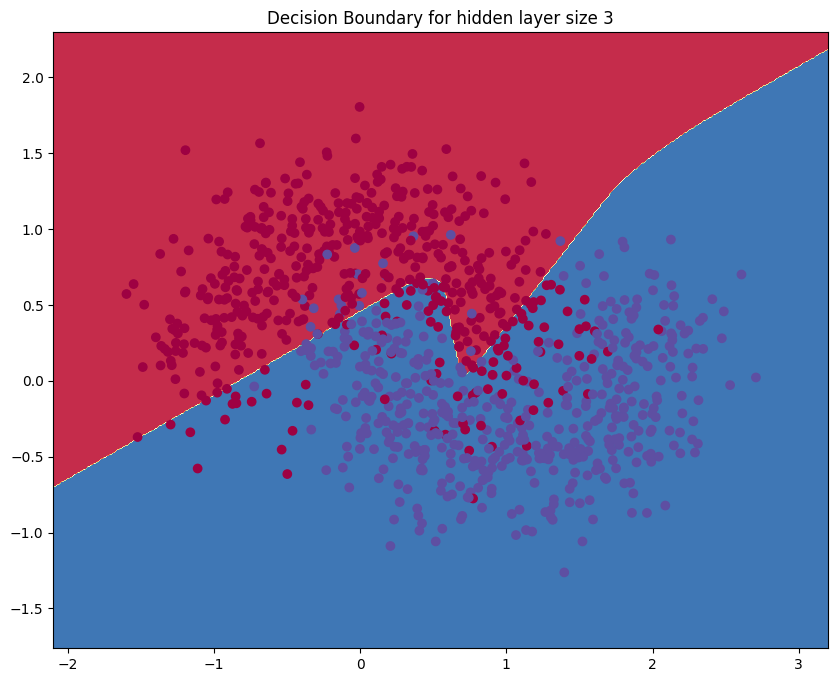

In [99]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)
y_pred = predict(model, X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
print(f'Hidden Layer size {nn_hdim}, Test Accuracy: {accuracy}')

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

Yay! This looks pretty good. Our neural networks was able to find a decision boundary that successfully separates the classes.

# Varying the hidden layer size

In the example above we picked a hidden layer size of 3. Let's now get a sense of how varying the hidden layer size affects the result.


Hidden Layer size 1, Test Accuracy: 0.84
Hidden Layer size 2, Test Accuracy: 0.5
Hidden Layer size 3, Test Accuracy: 0.86
Hidden Layer size 4, Test Accuracy: 0.88
Hidden Layer size 5, Test Accuracy: 0.88
Hidden Layer size 20, Test Accuracy: 0.84


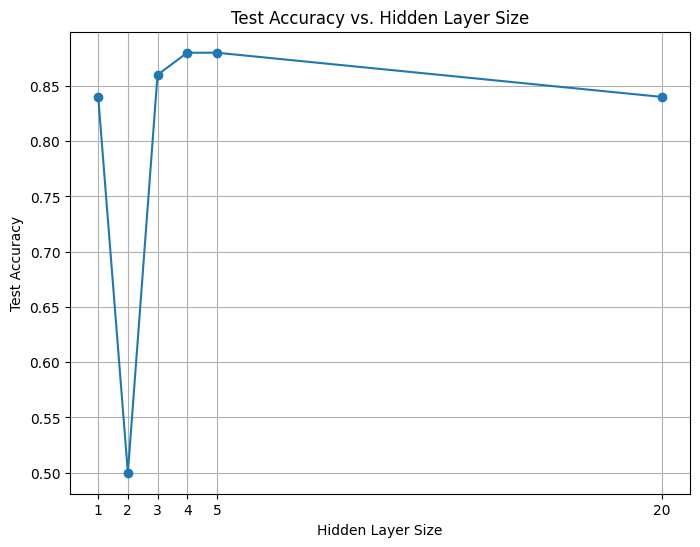

In [52]:
# Additional test samples
X_test, y_test = sklearn.datasets.make_moons(n_samples=50, shuffle=True, noise=0.30)

# Evaluate accuracy on test samples for different hidden layer sizes
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20]
accuracies = []

for nn_hdim in hidden_layer_dimensions:
    model = build_model(nn_hdim)
    y_pred = predict(model, X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Hidden Layer size {nn_hdim}, Test Accuracy: {accuracy}')

# Plot accuracies vs. hidden layer sizes
plt.figure(figsize=(8, 6))
plt.plot(hidden_layer_dimensions, accuracies, marker='o')
plt.title('Test Accuracy vs. Hidden Layer Size')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Test Accuracy')
plt.xticks(hidden_layer_dimensions)
plt.grid(True)
plt.show()

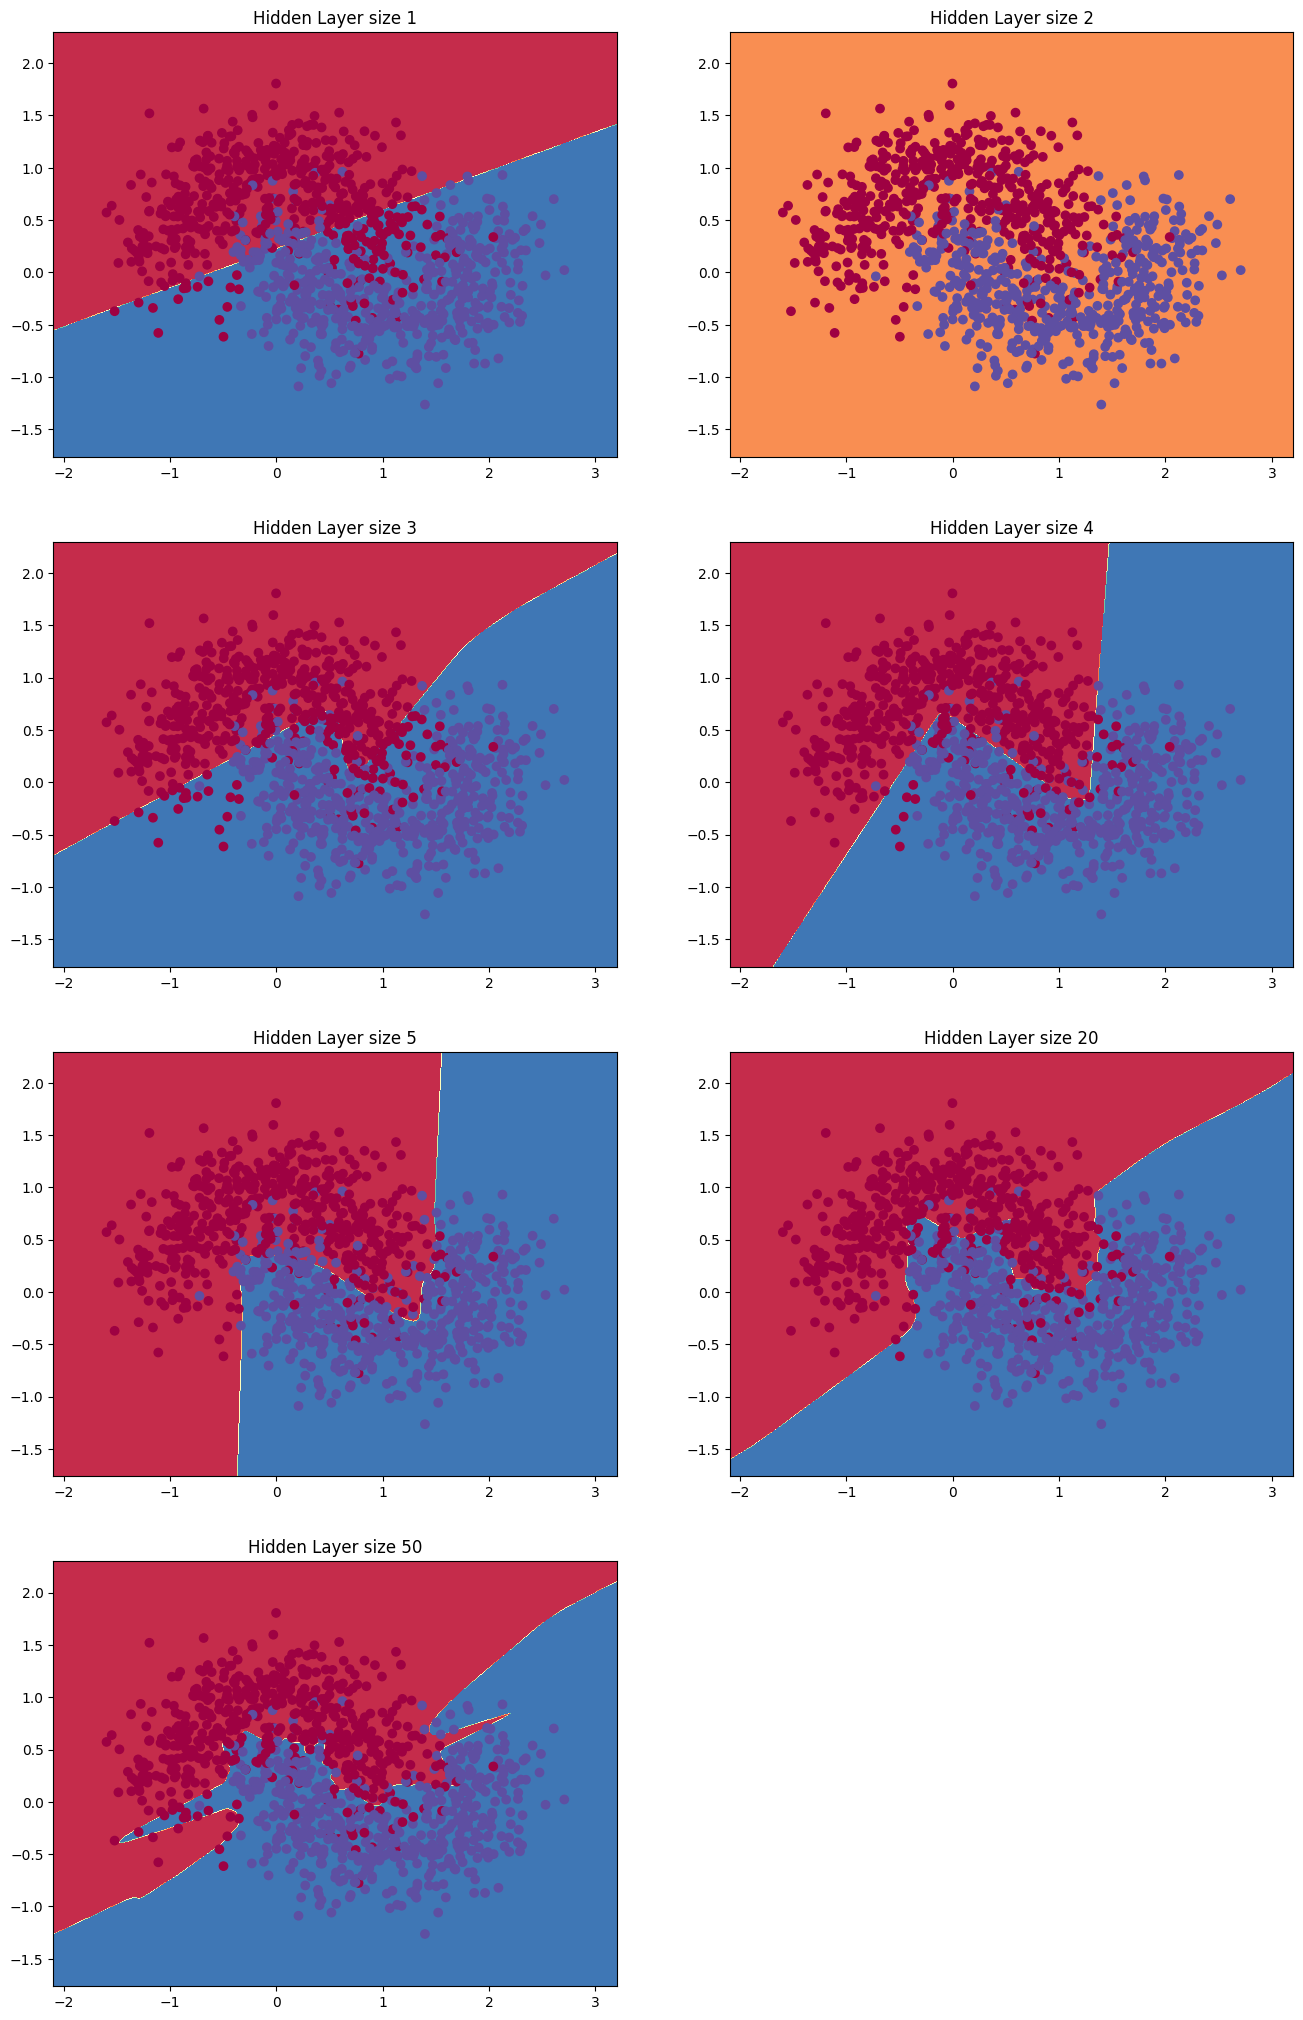

In [53]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

We can see that while a hidden layer of low dimensionality nicely capture the general trend of our data, but higher dimensionalities are prone to overfitting. They are "memorizing" the data as opposed to fitting the general shape. If we were to evaluate our model on a separate test set (and you should!) the model with a smaller hidden layer size would likely perform better because it generalizes better. We could counteract overfitting with stronger regularization, but picking the correct size for hidden layer is a much more "economical" solution.

# Spike 1: Let's Try Minibatch Gradient Descent

Instead of batch gradient descent, use minibatch gradient descent ([more info](http://cs231n.github.io/optimization-1/#gd)) to train the network. Minibatch gradient descent typically performs better in practice. Here I used the batch size as 32.

In [54]:
def build_model_batch(nn_hdim, num_passes=5000, print_loss=False, batch_size=64):

    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}

    # Gradient descent. For each pass...
    for i in range(0, num_passes):

        # Shuffle the data
        permutation = np.random.permutation(X.shape[0])
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        # Iterate over mini-batches
        for j in range(0, X.shape[0], batch_size):
            # Get mini-batch
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]
            num_examples = X_batch.shape[0]

            # Forward propagation
            z1 = X_batch.dot(W1) + b1
            a1 = np.tanh(z1)
            z2 = a1.dot(W2) + b2
            exp_scores = np.exp(z2)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

            # Backpropagation
            delta3 = probs
            delta3[range(num_examples), y_batch] -= 1
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(X_batch.T, delta2)
            db1 = np.sum(delta2, axis=0)

            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += reg_lambda * W2
            dW1 += reg_lambda * W1

            # Gradient descent parameter update
            W1 += -epsilon * dW1
            b1 += -epsilon * db1
            W2 += -epsilon * dW2
            b2 += -epsilon * db2

        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        # Optionally print the loss.
        if print_loss and i % 1000 == 0:
            loss = calculate_loss(model)
            print("Loss after iteration %i: %f" % (i, loss))

    return model


We could see that the test accuracy just increased significantly, from 0.88 to 0.92.

Loss after iteration 0: 0.364381
Loss after iteration 1000: 0.207233
Loss after iteration 2000: 0.211187
Loss after iteration 3000: 0.216339
Loss after iteration 4000: 0.208917
Hidden Layer size 5, Test Accuracy: 0.92


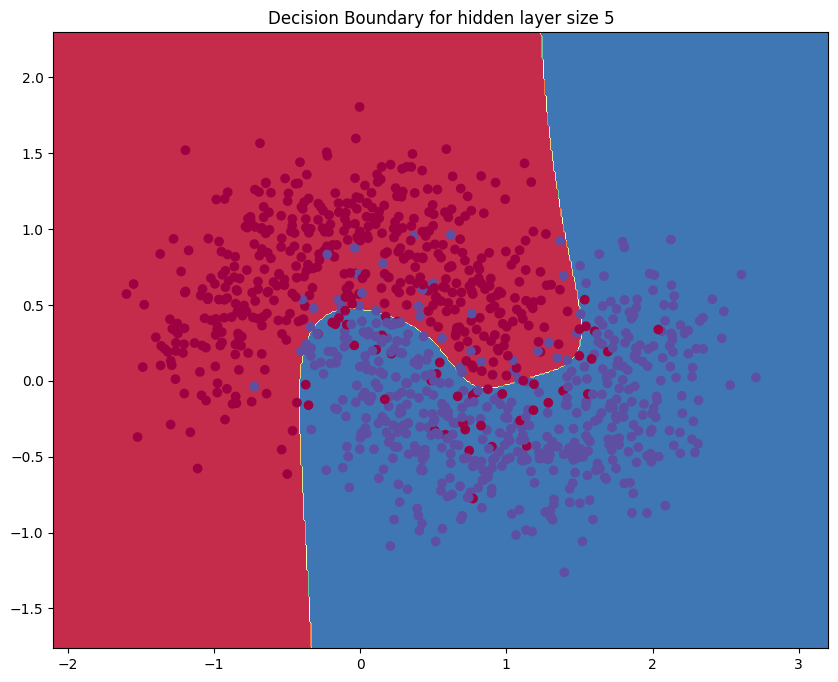

In [68]:
# mini-batch size 32
batch_size = 32

# Build a model with a 5-dimensional hidden layer
# 5 is the best dimension size from above
model = build_model_batch(5, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 5")

# Evaluate accuracy on test samples
accuracies = []
y_pred = predict(model, X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
print(f'Hidden Layer size 5, Test Accuracy: {accuracy}')

# Spike 2: Let's Try Non-fixed Learning Rate
We used a fixed learning rate $\epsilon$ for gradient descent. Implement an annealing schedule for the gradient descent learning rate ([more info](http://cs231n.github.io/neural-networks-3/#anneal)).

Now the Lr will decrease as time goes longer!

In [57]:
def build_model_dynamic_lr(nn_hdim, num_passes=5000, print_loss=False, batch_size=64, initial_epsilon=0.01, decay_rate=0.01):

    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}

    # Initialize learning rate
    epsilon = initial_epsilon

    # Gradient descent. For each pass...
    for i in range(0, num_passes):

        # Shuffle the data
        permutation = np.random.permutation(X.shape[0])
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        # Iterate over mini-batches
        for j in range(0, X.shape[0], batch_size):
            # Get mini-batch
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]
            num_examples = X_batch.shape[0]

            # Forward propagation
            z1 = X_batch.dot(W1) + b1
            a1 = np.tanh(z1)
            z2 = a1.dot(W2) + b2
            exp_scores = np.exp(z2)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

            # Backpropagation
            delta3 = probs
            delta3[range(num_examples), y_batch] -= 1
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(X_batch.T, delta2)
            db1 = np.sum(delta2, axis=0)

            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += reg_lambda * W2
            dW1 += reg_lambda * W1

            # Gradient descent parameter update with annealing schedule
            W1 += -epsilon * dW1
            b1 += -epsilon * db1
            W2 += -epsilon * dW2
            b2 += -epsilon * db2

        # Anneal the learning rate
        epsilon *= 1 / (1 + decay_rate * i)

        # Assign new parameters to the model
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        # Optionally print the loss.
        if print_loss and i % 1000 == 0:
            loss = calculate_loss(model)
            print("Loss after iteration %i: %f" % (i, loss))

    return model


Loss after iteration 0: 0.364381
Loss after iteration 1000: 0.207233
Loss after iteration 2000: 0.211187
Loss after iteration 3000: 0.216339
Loss after iteration 4000: 0.208917
Hidden Layer size 5, Test Accuracy: 0.92


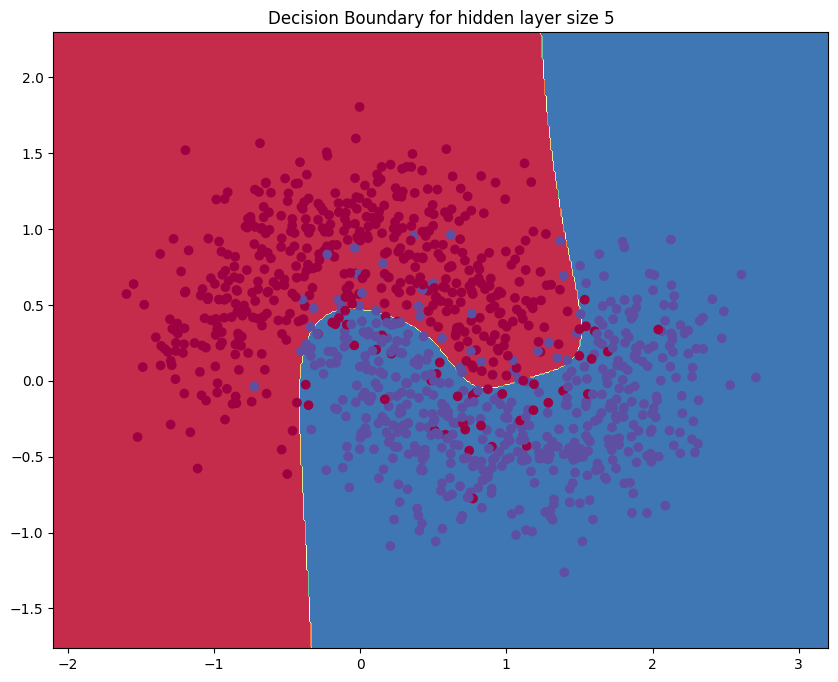

In [73]:
# same settings as above
batch_size = 32
model = build_model_batch(5, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 5")

# Evaluate accuracy on test samples
accuracies = []
y_pred = predict(model, X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
print(f'Hidden Layer size 5, Test Accuracy: {accuracy}')

# Spike 3: Let's try different activation functions
We used a $\tanh$ activation function for our hidden layer. Experiment with other activation functions (some are mentioned above). Note that changing the activation function also means changing the backpropagation derivative.

In [61]:
def build_model_activations(nn_hdim, activation='relu', num_passes=5000, print_loss=False, batch_size=64, initial_epsilon=0.01, decay_rate=0.01):

    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}

    # Initialize learning rate
    epsilon = initial_epsilon

    # Activation functions
    if activation == 'sigmoid':
        activation_fn = lambda z: 1 / (1 + np.exp(-z))
    elif activation == 'tanh':
        activation_fn = lambda z: np.tanh(z)
    elif activation == 'relu':
        activation_fn = lambda z: np.maximum(0, z)
    elif activation == 'leaky_relu':
        activation_fn = lambda z: np.maximum(0.01 * z, z)
    elif activation == 'softplus':
        activation_fn = lambda z: np.log(1 + np.exp(z))
    else:
        raise ValueError("Unsupported activation function.")

    # Gradient descent. For each pass...
    for i in range(num_passes):

        # Shuffle the data
        permutation = np.random.permutation(X.shape[0])
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        # Iterate over mini-batches
        for j in range(0, X.shape[0], batch_size):
            # Get mini-batch
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]
            num_examples = X_batch.shape[0]

            # Forward propagation
            z1 = X_batch.dot(W1) + b1
            a1 = activation_fn(z1)
            z2 = a1.dot(W2) + b2
            exp_scores = np.exp(z2)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

            # Backpropagation
            delta3 = probs
            delta3[range(num_examples), y_batch] -= 1
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))  # derivative of tanh
            dW1 = np.dot(X_batch.T, delta2)
            db1 = np.sum(delta2, axis=0)

            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += reg_lambda * W2
            dW1 += reg_lambda * W1

            # Gradient descent parameter update with annealing schedule
            W1 += -epsilon * dW1
            b1 += -epsilon * db1
            W2 += -epsilon * dW2
            b2 += -epsilon * db2

        # Anneal the learning rate
        epsilon *= 1 / (1 + decay_rate * i)

        # Assign new parameters to the model
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        # Optionally print the loss.
        if print_loss and i % 1000 == 0:
            loss = calculate_loss(model)
            print("Loss after iteration %i: %f" % (i, loss))

    return model


In [70]:
# Evaluate accuracy on test samples for different activation functions
activations = ['tanh', 'sigmoid', 'softplus']
accuracies = []

for func in activations:
    model = build_model_activations(nn_hdim=5, activation=func, num_passes=5000, print_loss=True)
    y_pred = predict(model, X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Hidden Layer size 5, Test Accuracy: {accuracy}')

Loss after iteration 0: 0.364381
Loss after iteration 1000: 0.275528
Loss after iteration 2000: 0.275528
Loss after iteration 3000: 0.275528
Loss after iteration 4000: 0.275528
Hidden Layer size 5, Test Accuracy: 0.8775
Loss after iteration 0: 0.442101
Loss after iteration 1000: 0.437431
Loss after iteration 2000: 0.437431
Loss after iteration 3000: 0.437431
Loss after iteration 4000: 0.437431
Hidden Layer size 5, Test Accuracy: 0.845
Loss after iteration 0: nan


<ipython-input-61-920e2e3dbd18>:26: RuntimeWarning: overflow encountered in exp
  activation_fn = lambda z: np.log(1 + np.exp(z))
<ipython-input-61-920e2e3dbd18>:49: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(z2)
<ipython-input-61-920e2e3dbd18>:50: RuntimeWarning: invalid value encountered in divide
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


Loss after iteration 1000: nan
Loss after iteration 2000: nan
Loss after iteration 3000: nan
Loss after iteration 4000: nan
Hidden Layer size 5, Test Accuracy: 0.5


# Spike 4: Let's add one more hidden layer

Extend the network to four layers. Experiment with the layer size. Adding another hidden layer means you will need to adjust both the forward propagation as well as the backpropagation code.


In [104]:
def build_model_add_layer(nn_hdim, num_passes=200, print_loss=False, batch_size=32):

    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_hdim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_hdim))
    W3 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b3 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    epsilon = 0.001
    # Gradient descent. For each pass...
    for i in range(0, num_passes):

        # Shuffle the data
        permutation = np.random.permutation(X.shape[0])
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        # Iterate over mini-batches
        for j in range(0, X.shape[0], batch_size):
            # Get mini-batch
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]
            num_examples = X_batch.shape[0]

            # Forward propagation
            z1 = X_batch.dot(W1) + b1
            a1 = np.tanh(z1)
            z2 = a1.dot(W2) + b2
            a2 = np.tanh(z2)  # Output of the new hidden layer
            z3 = a2.dot(W3) + b3
            exp_scores = np.exp(z3)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

            # Backpropagation
            delta4 = probs
            delta4[range(num_examples), y_batch] -= 1
            dW3 = (a2.T).dot(delta4)
            db3 = np.sum(delta4, axis=0, keepdims=True)
            delta3 = delta4.dot(W3.T) * (1 - np.power(a2, 2))
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(X_batch.T, delta2)
            db1 = np.sum(delta2, axis=0)

            # Add regularization terms
            dW3 += reg_lambda * W3
            dW2 += reg_lambda * W2
            dW1 += reg_lambda * W1

            # Gradient descent parameter update
            W1 += -epsilon * dW1
            b1 += -epsilon * db1
            W2 += -epsilon * dW2
            b2 += -epsilon * db2
            W3 += -epsilon * dW3
            b3 += -epsilon * db3

        epsilon *= 1 / (1 + 0.001 * i)

        # Assign new parameters to the model
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}

        # Optionally print the loss.
        if print_loss and i % 50 == 0:
            loss = calculate_loss(model)
            print("Loss after iteration %i: %f" % (i, loss))

    return model


It is overfitting crazyly!

In [105]:
# same settings as above
batch_size = 32
model = build_model_add_layer(, print_loss=True)

# Evaluate accuracy on test samples
accuracies = []
y_pred = predict(model, X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
print(f'Hidden Layer size 5, Test Accuracy: {accuracy}')

Loss after iteration 0: 1.236317
Loss after iteration 50: 1.363576
Loss after iteration 100: 1.355688
Loss after iteration 150: 1.355532
Hidden Layer size 5, Test Accuracy: 0.1125
